In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
sns.set(color_codes=True)
%matplotlib inline


In [2]:
df=pd.read_csv('Statewise Inventory of Geological Resources of Coal- StatewiseFieldwise Inventory of Geographical Reserve of Coal.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Coal type,Coal produced from proved resources,Coal produced from indicated resources,Coal produced from inferred resources
0,1,India,1,Jammu And Kashmir,2018,Lignite,0.00,19.757094,7.12231
1,2,India,1,Jammu And Kashmir,2019,Lignite,0.00,19.757094,7.12231
2,3,India,1,Jammu And Kashmir,2020,Lignite,0.00,19.757094,7.12231
3,4,India,8,Rajasthan,2018,Lignite,1168.53,3029.780000,2150.77000
4,5,India,8,Rajasthan,2019,Lignite,1168.53,3029.780000,2150.77000
...,...,...,...,...,...,...,...,...,...
64,65,India,36,Telangana,2019,Coal,10622.00,8565.000000,2652.00000
65,66,India,36,Telangana,2020,Coal,10841.00,8521.000000,2863.00000
66,67,India,37,Ladakh,2018,Lignite,0.00,0.492906,0.17769
67,68,India,37,Ladakh,2019,Lignite,0.00,0.492906,0.17769


In [3]:
#Checking if our Data has any NULL Values?
df.isna().sum()

Rowid                                     0
Country                                   0
State lgd code                            0
State                                     0
Year                                      0
Coal type                                 0
Coal produced from proved resources       0
Coal produced from indicated resources    0
Coal produced from inferred resources     0
dtype: int64

In [5]:
#List of Categorical Columns and number of uniqu values

print('No. of Unique Values in Each Column:\n')
for col in df.columns:
    #Unique Value of each column
    unique_values = pd.unique(df[col].dropna())
    
    if len(unique_values)<=42:    
        print(f'{col} : %d'%len(unique_values))
        print('Values: ',end='')
        print(unique_values)
        print('\n')
    else:
       print(f'{col} : %d \n'%len(unique_values)) 

No. of Unique Values in Each Column:

Rowid : 69 

Country : 1
Values: ['India']


State lgd code : 22
Values: [ 1  8  9 10 11 12 13 17 18 19 20 21 22 23 24 27 28 32 33 34 36 37]


State : 22
Values: ['Jammu And Kashmir' 'Rajasthan' 'Uttar Pradesh' 'Bihar' 'Sikkim'
 'Arunachal Pradesh' 'Nagaland' 'Meghalaya' 'Assam' 'West Bengal'
 'Jharkhand' 'Odisha' 'Chhattisgarh' 'Madhya Pradesh' 'Gujarat'
 'Maharashtra' 'Andhra Pradesh' 'Kerala' 'Tamil Nadu' 'Puducherry'
 'Telangana' 'Ladakh']


Year : 3
Values: [2018 2019 2020]


Coal type : 2
Values: ['Lignite' 'Coal']


Coal produced from proved resources : 34
Values: [0.00000e+00 1.16853e+03 8.84000e+02 1.61000e+02 3.10000e+02 3.10000e+01
 9.00000e+00 8.90000e+01 4.65000e+02 1.41560e+04 1.42190e+04 1.51890e+04
 4.55630e+04 4.80320e+04 4.94690e+04 3.73910e+04 3.96540e+04 4.08720e+04
 2.04280e+04 2.14460e+04 2.49850e+04 1.19580e+04 1.21820e+04 1.25970e+04
 1.27865e+03 7.17800e+03 7.57300e+03 7.62400e+03 9.70000e+01 4.09353e+03
 4.34035e+03 1.0475

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Rowid                                   69 non-null     int64  
 1   Country                                 69 non-null     object 
 2   State lgd code                          69 non-null     int64  
 3   State                                   69 non-null     object 
 4   Year                                    69 non-null     int64  
 5   Coal type                               69 non-null     object 
 6   Coal produced from proved resources     69 non-null     float64
 7   Coal produced from indicated resources  69 non-null     float64
 8   Coal produced from inferred resources   69 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 5.0+ KB


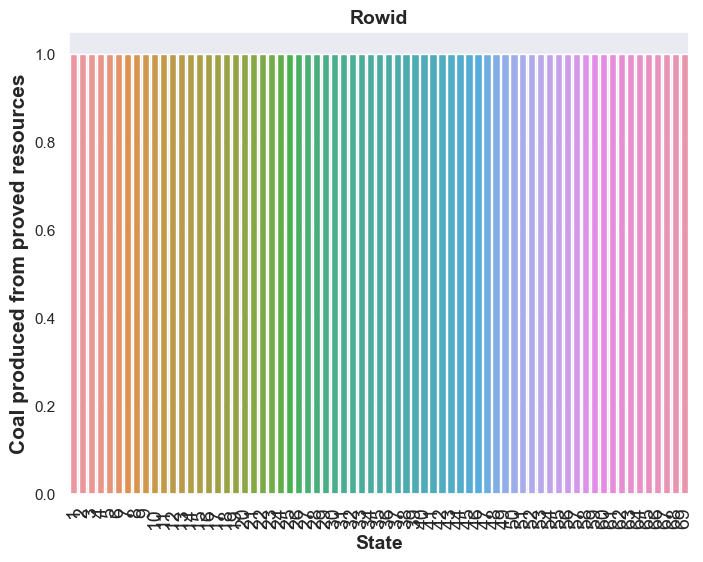

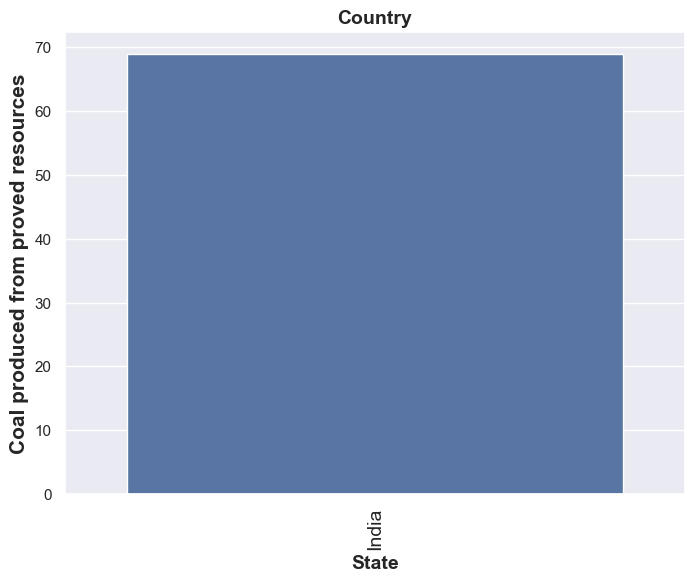

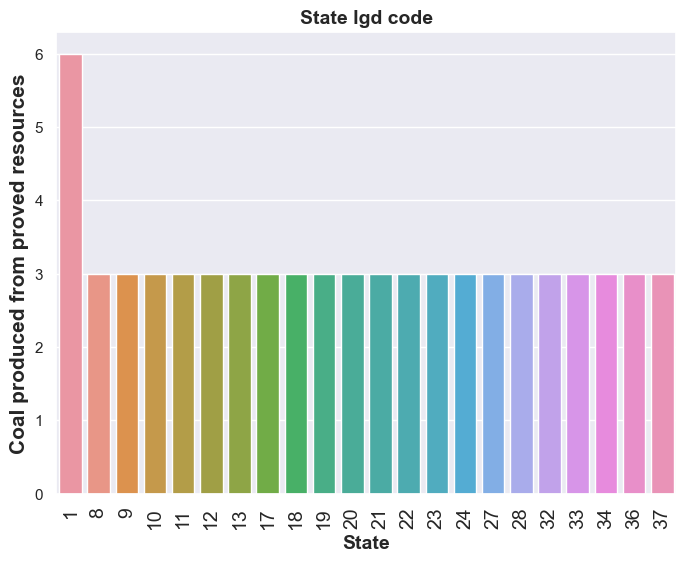

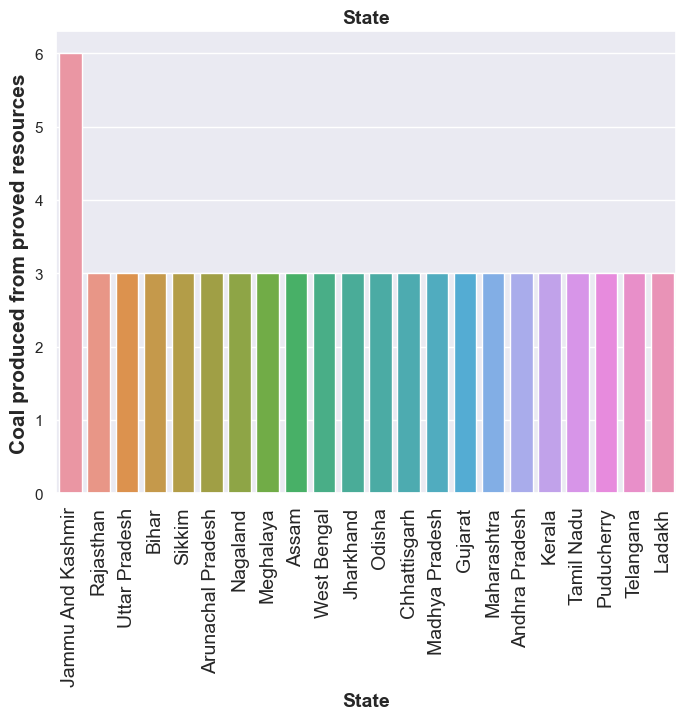

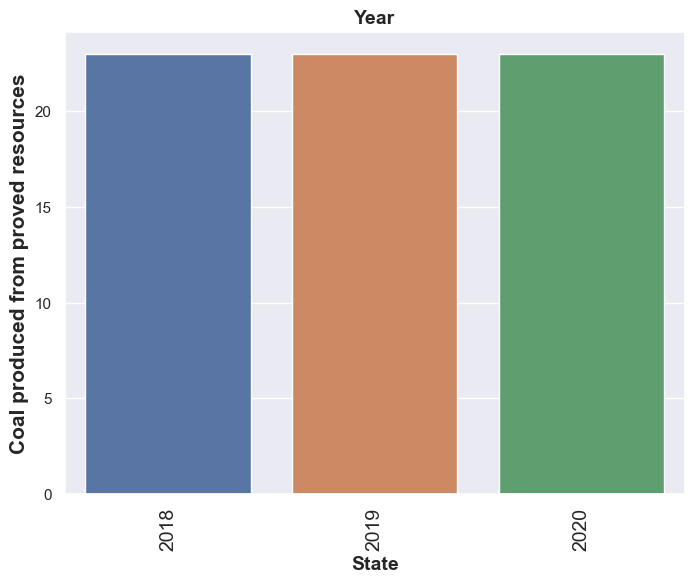

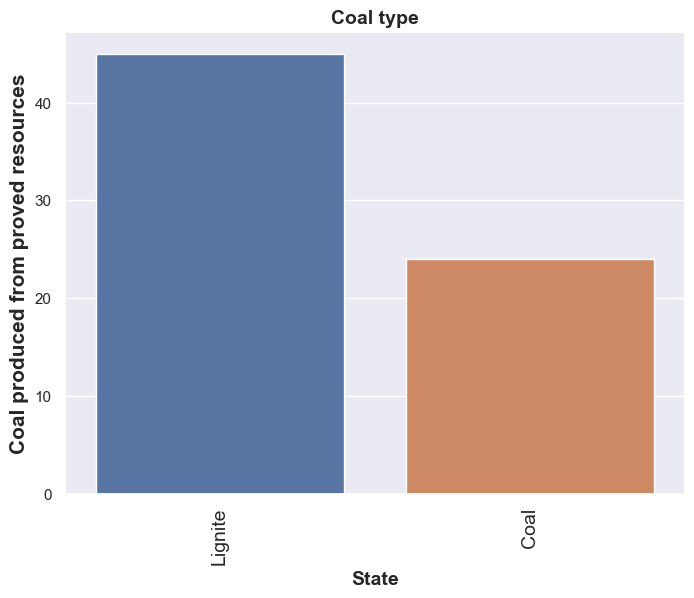

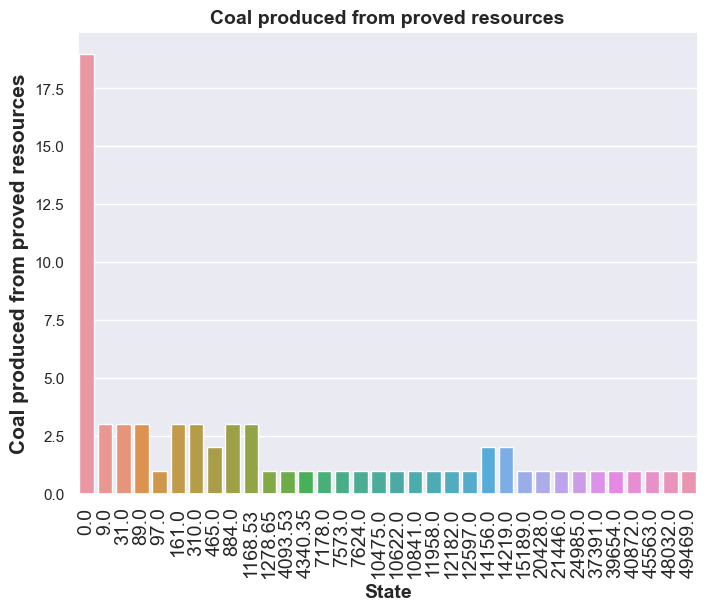

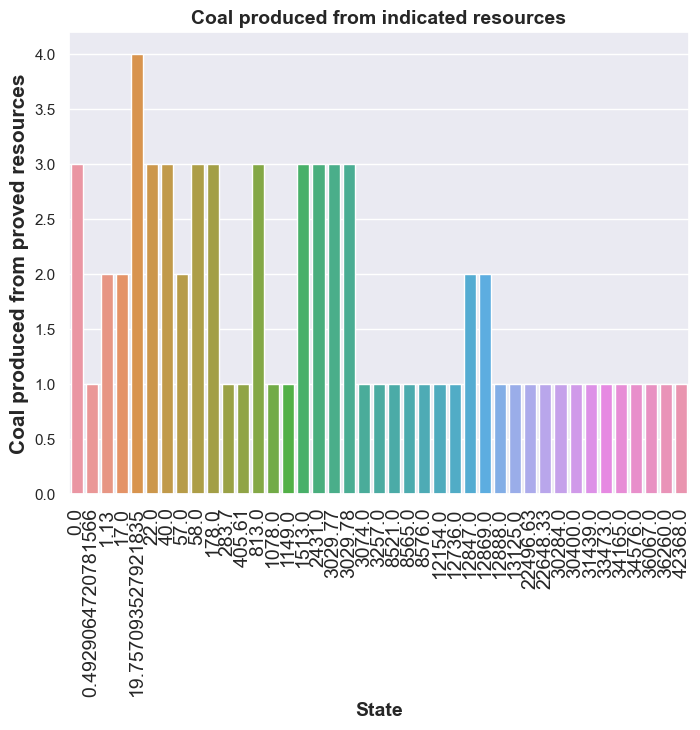

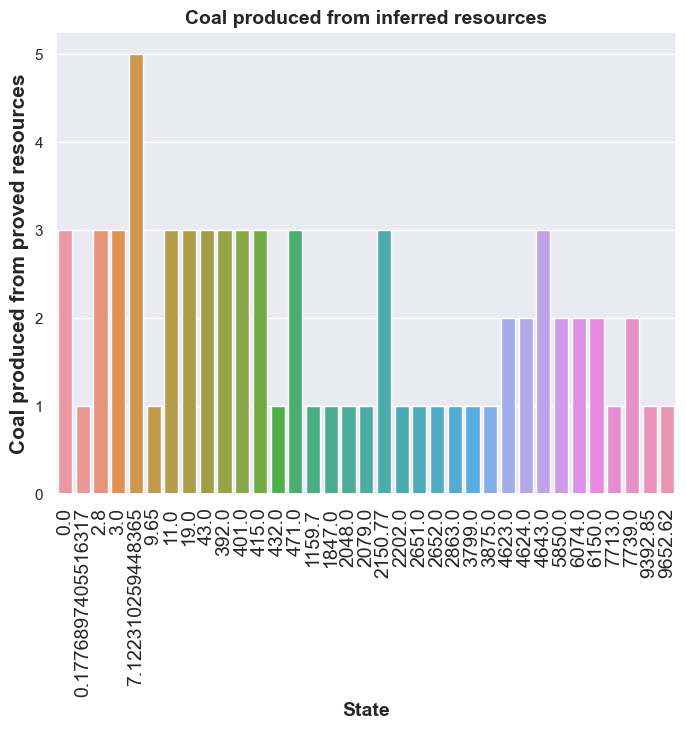

In [9]:
#Plotting Barplots for each Categorical Column
for col in df.columns:
    plt.subplots(figsize=(8,6))
    sns.barplot(x=pd.unique(df[col].dropna()),y=df[col].dropna().value_counts())
    
    plt.xticks(rotation=90, size=14)
    plt.xlabel('State', fontweight='bold',size=14)
    plt.ylabel('Coal produced from proved resources', fontweight='bold', size=15)
    plt.title(f'{col}', fontweight='bold', size=14)
    plt.show()

In [10]:
 
#Entropy of the given Data 
for col in df.columns:
    frequency = df[col].dropna().value_counts()
    N = sum(frequency)
    entropy = sum(-frequency*np.log(frequency/N)/N)
    print(f'Entropy of {col}: %f'%entropy) 

Entropy of Rowid: 4.234107
Entropy of Country: 0.000000
Entropy of State lgd code: 3.075221
Entropy of State: 3.075221
Entropy of Year: 1.098612
Entropy of Coal type: 0.646091
Entropy of Coal produced from proved resources: 3.028685
Entropy of Coal produced from indicated resources: 3.575628
Entropy of Coal produced from inferred resources: 3.423744


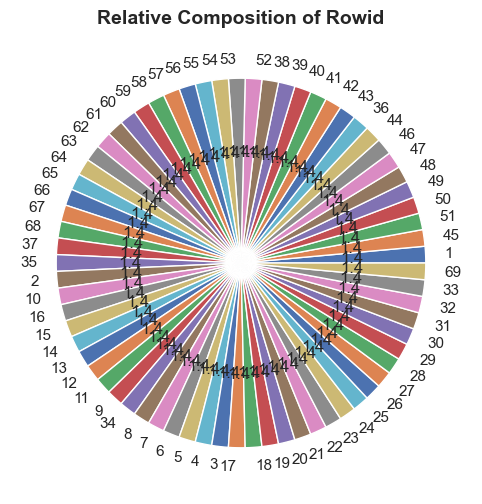

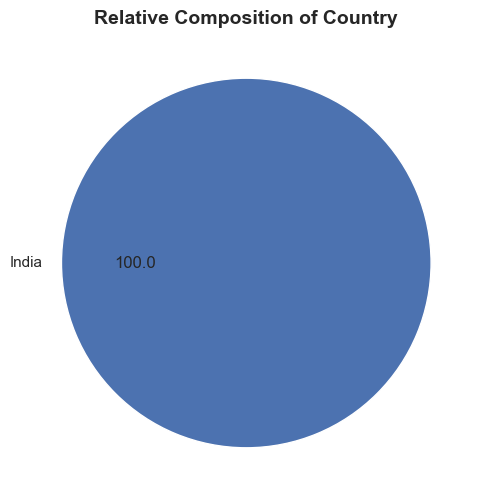

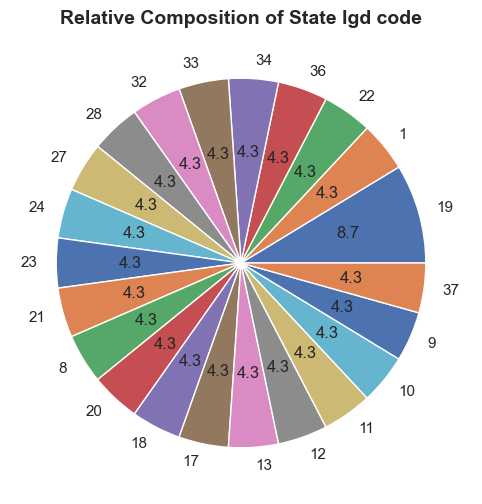

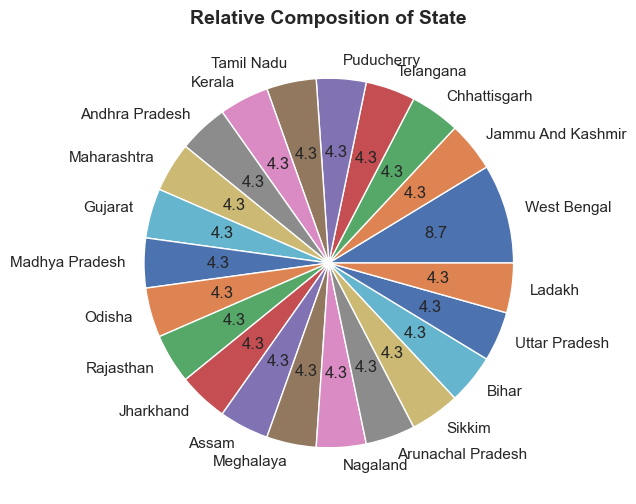

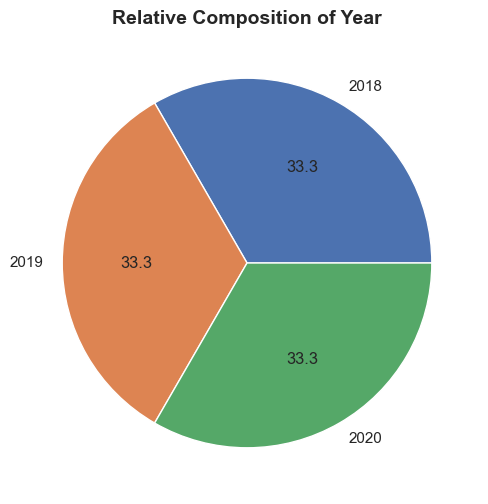

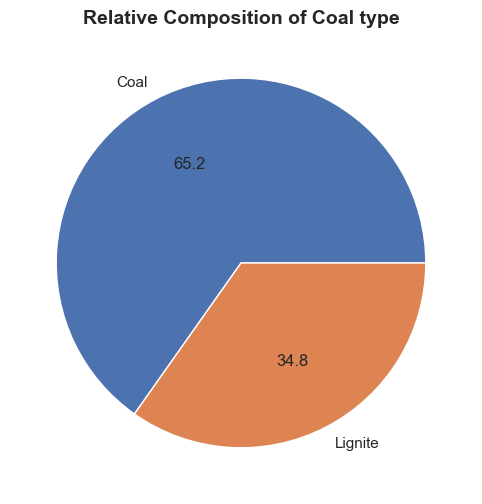

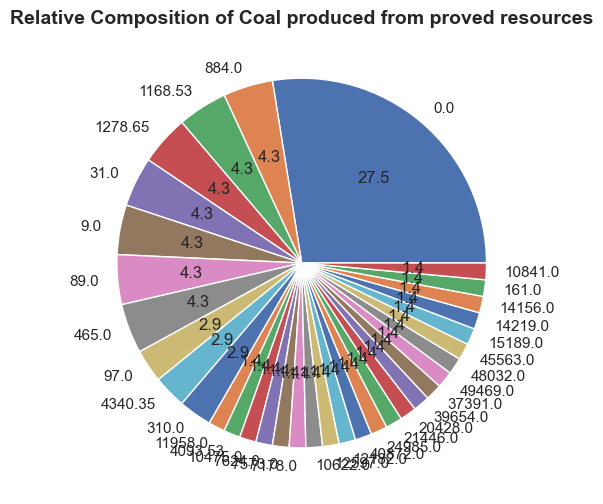

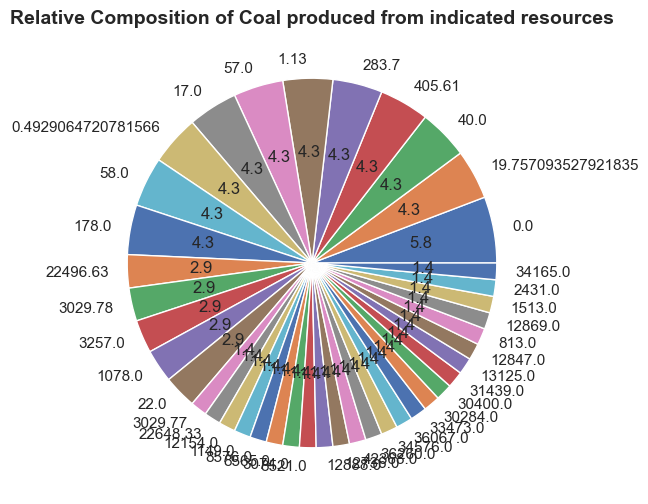

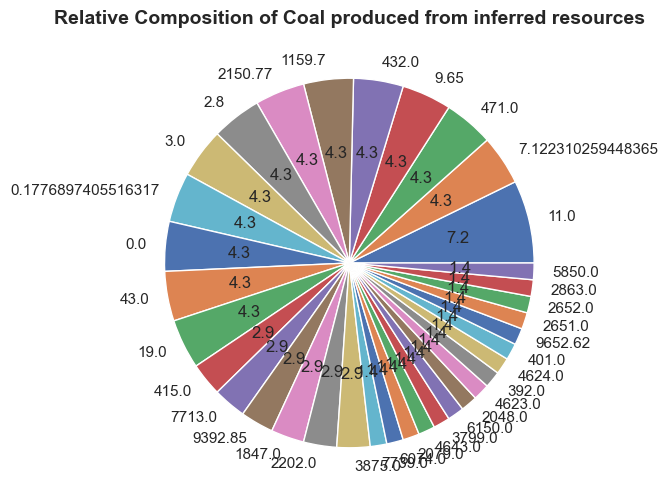

In [11]:
for col in df.columns:
    plt.subplots(figsize=(8,6))
    plt.pie(df[col].value_counts(), labels = df[col].value_counts().index, autopct ='%1.1f')
    plt.title(f'Relative Composition of {col}', fontweight = 'bold', size=14)
    plt.show()

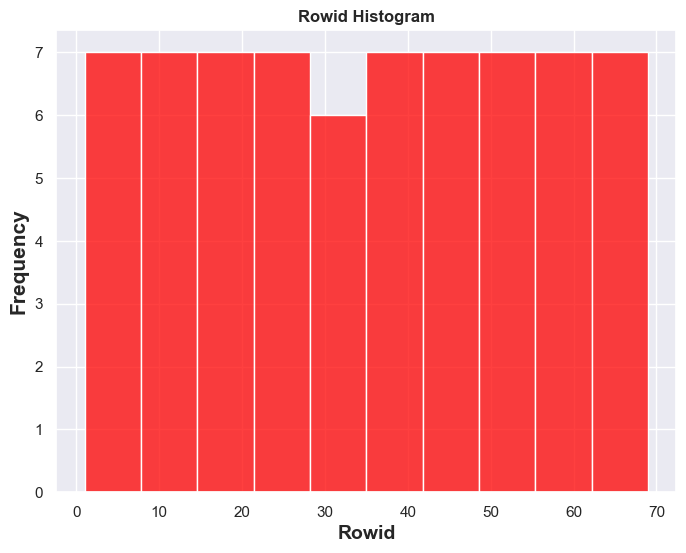

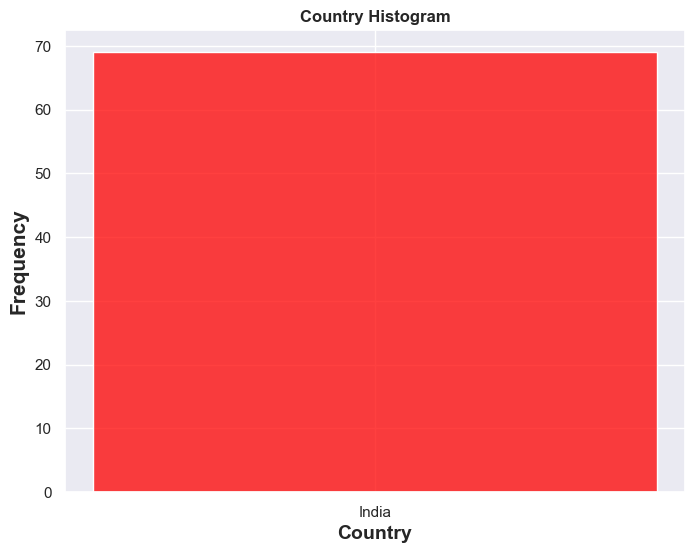

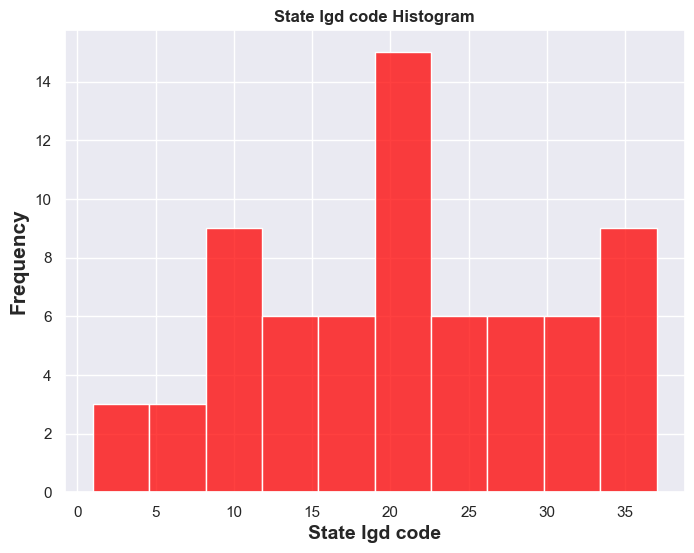

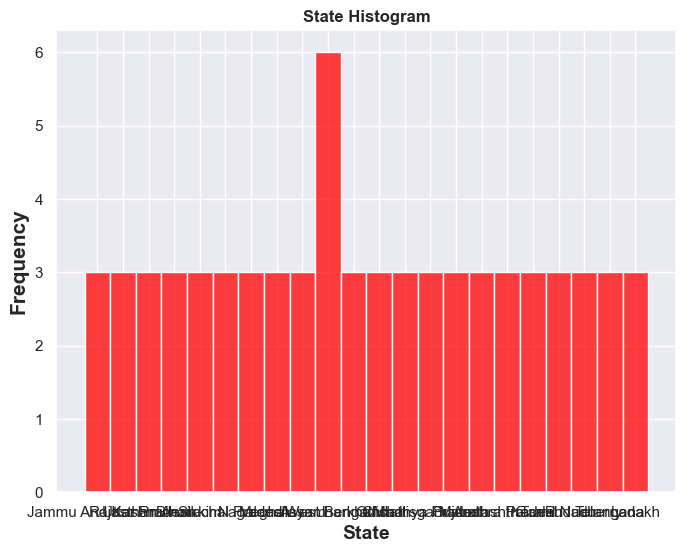

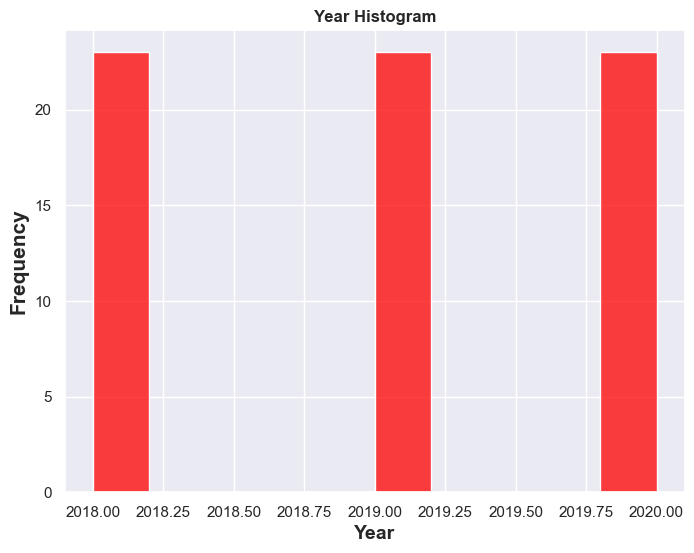

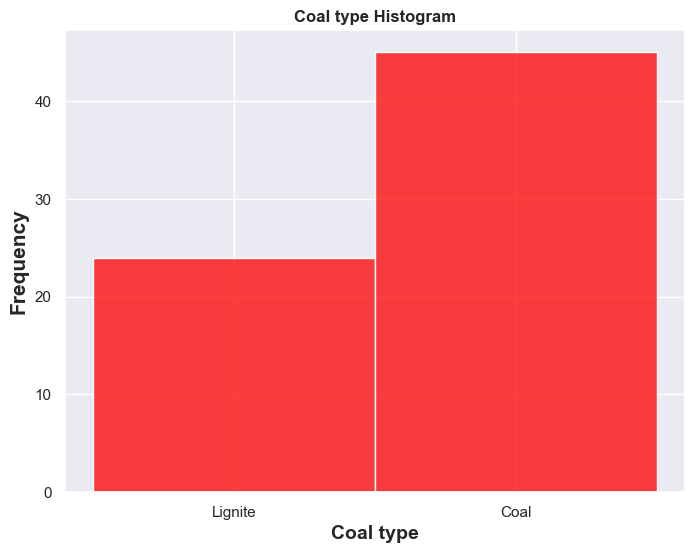

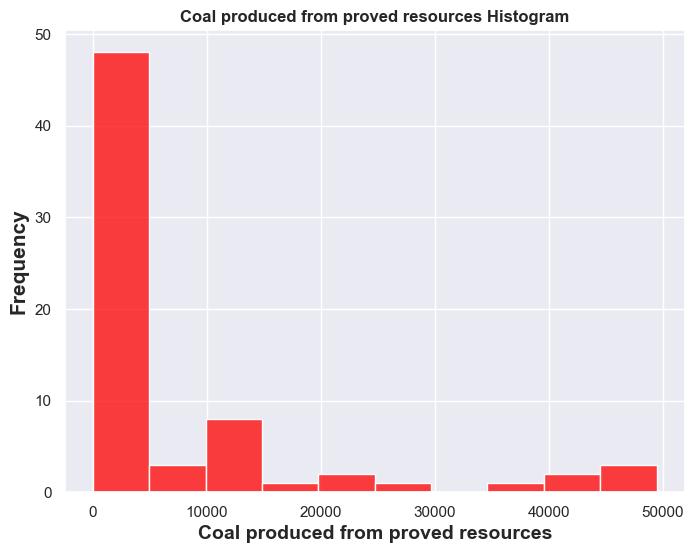

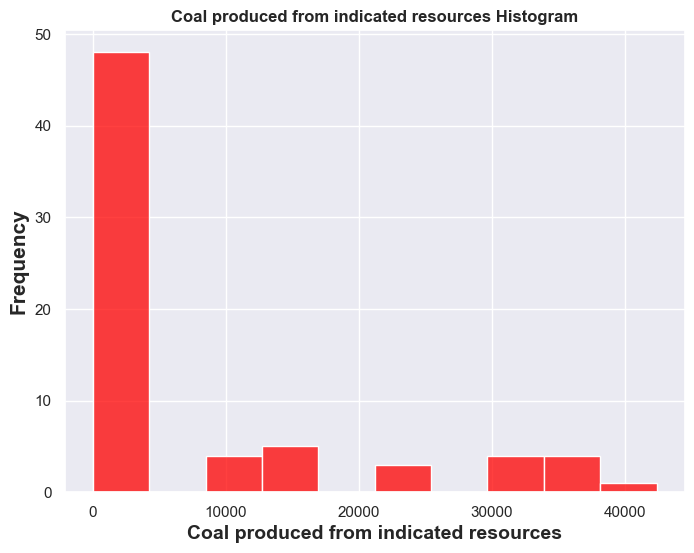

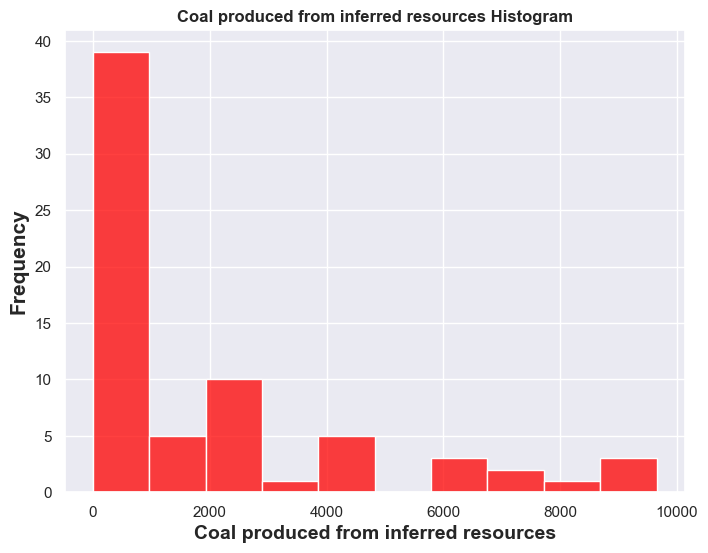

In [12]:
#Histogram for Continuous Variables
for col in df.columns:
    plt.subplots(figsize=(8,6))
    sns.histplot(df[col], bins = 10, color='red')
    plt.xlabel(f'{col}', size = 14, fontweight='bold')
    plt.ylabel('Frequency', size=15, fontweight='bold')
    plt.title(f'{col} Histogram', fontweight = 'bold')
    plt.show()

c:\Program Files\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


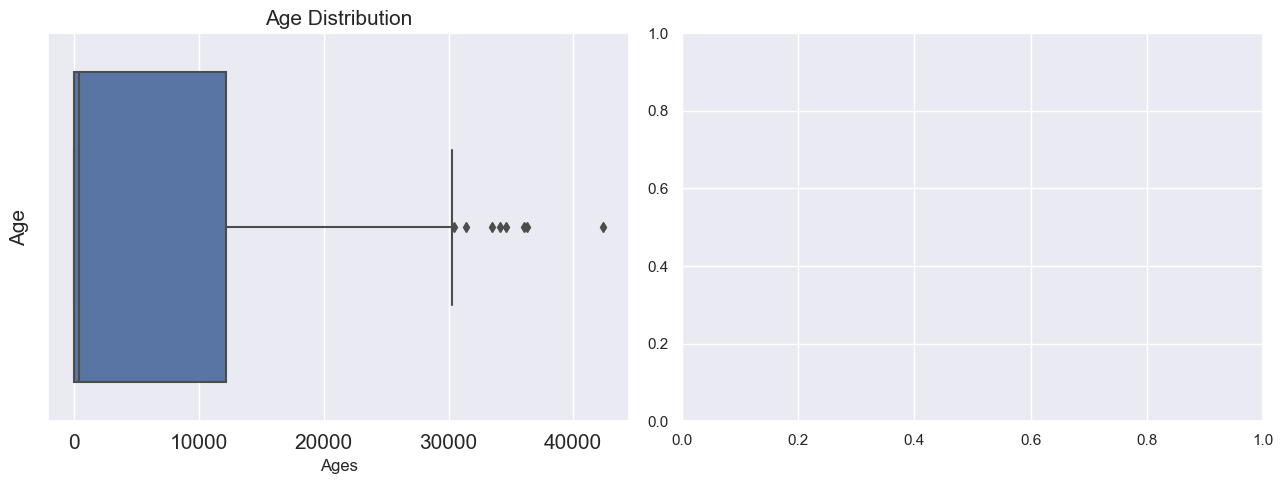

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13, 5))
sns.boxplot(x = 'Coal produced from indicated resources', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Coal')
ax1.set_ylabel('Coal produced from indicated resources (in metric tonnes)', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

# sns.distplot(df['Coal produced from indicated resources'], ax = ax2)
# sns.despine(ax = ax2)
# ax2.set_xlabel('Age', fontsize=15)
# ax2.set_ylabel('Occurence', fontsize=15)
# ax2.set_title('Occurence as a function of age', fontsize=15)
# ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() ;

# EDA completed as per EDA assignments